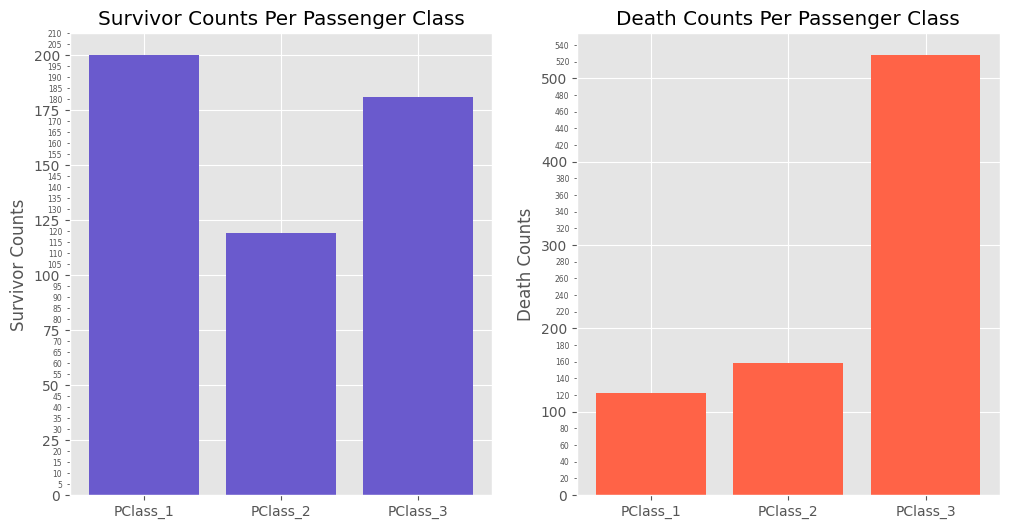

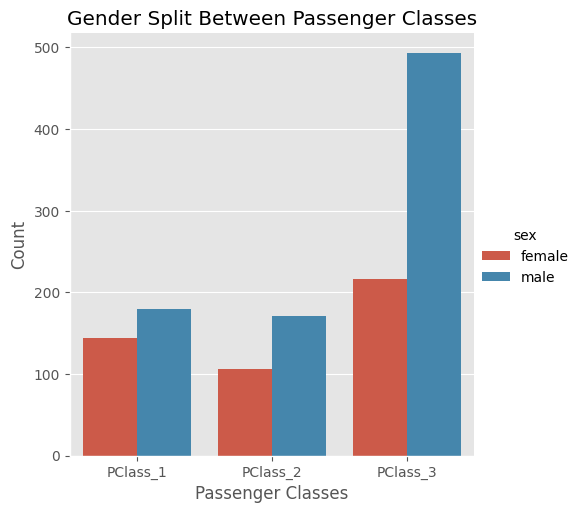

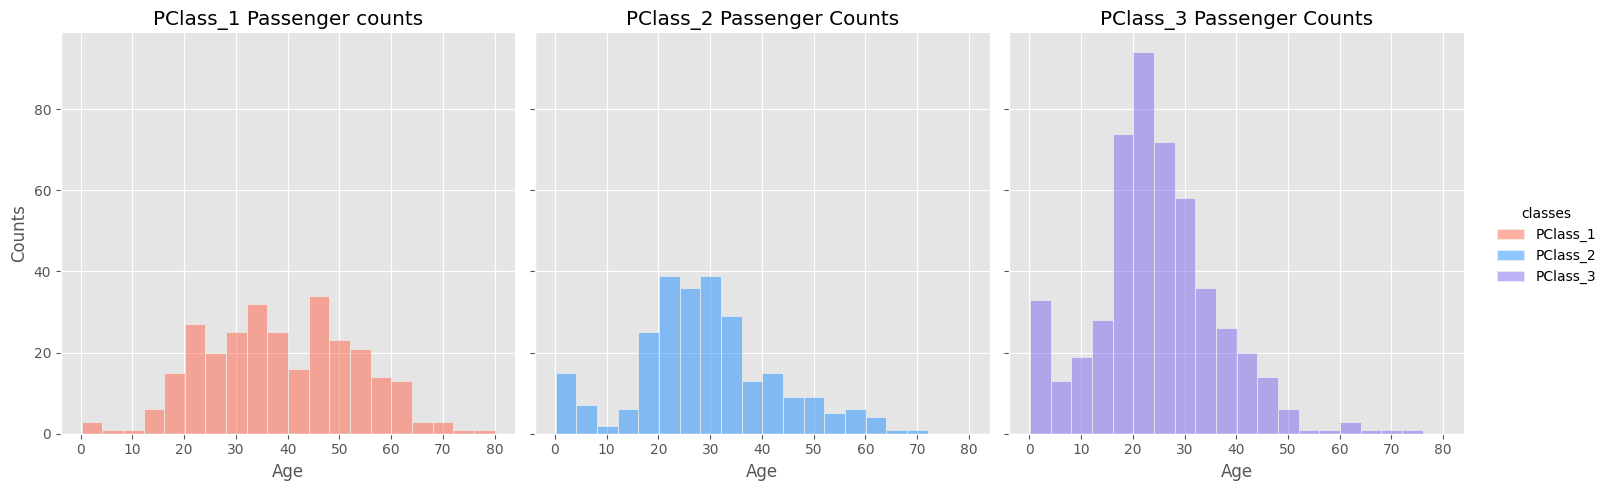

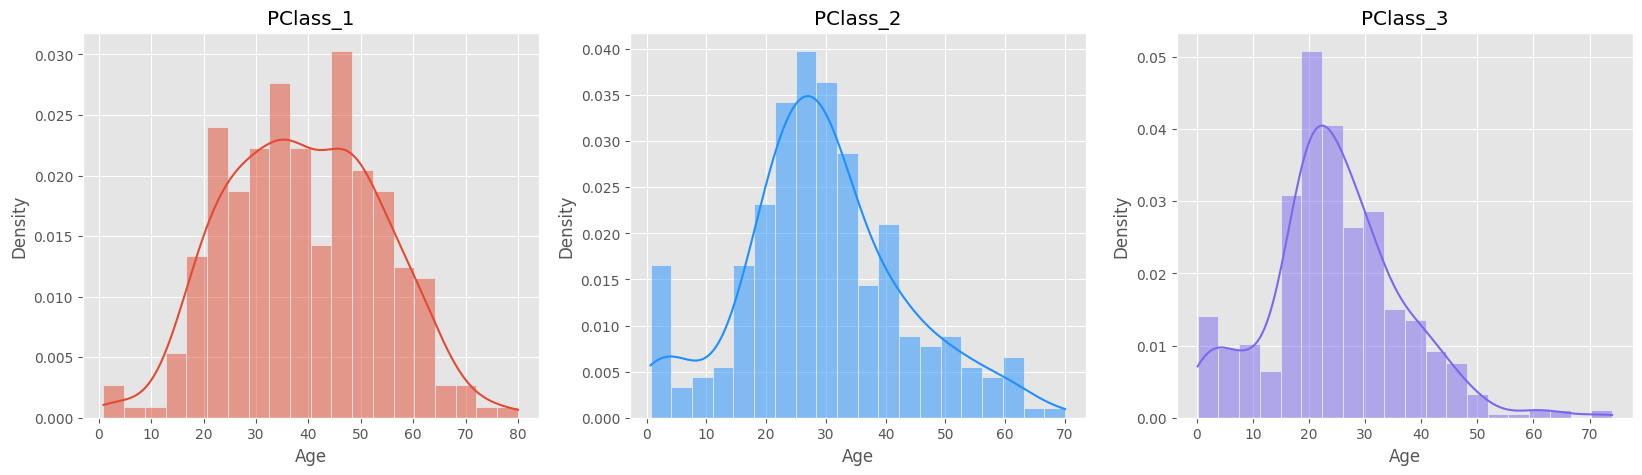

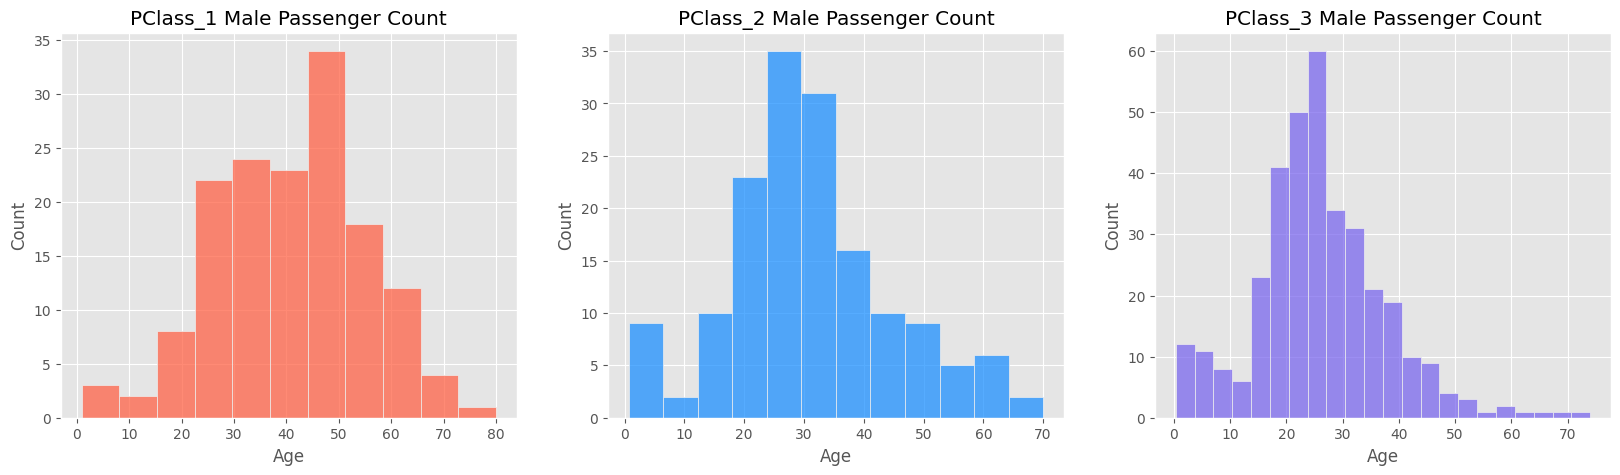

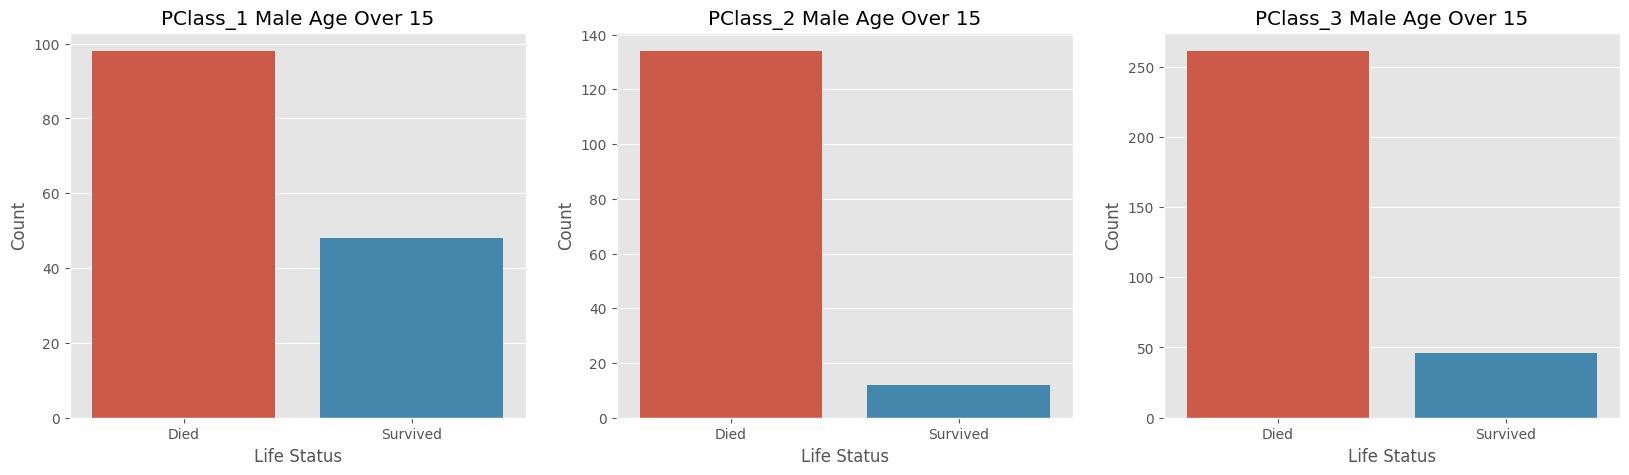

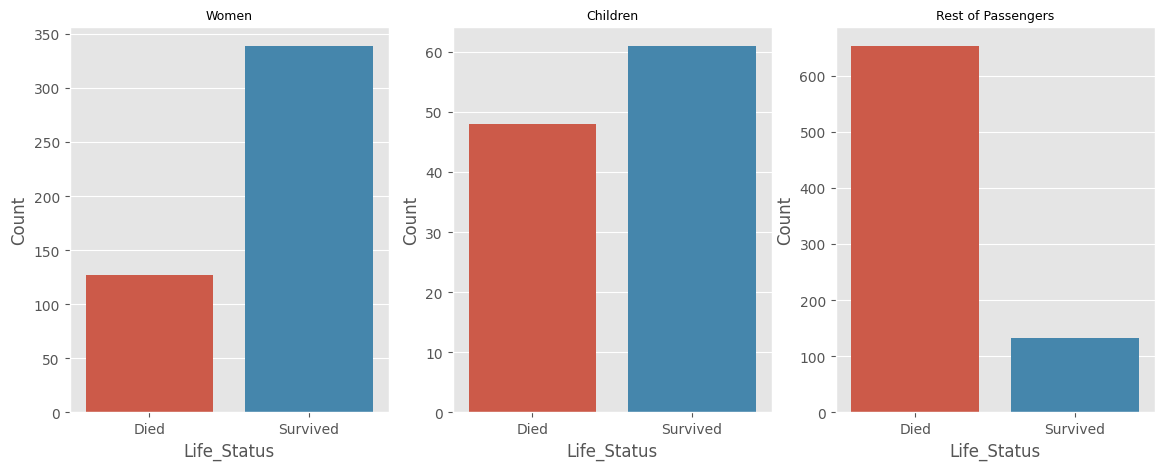

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator as ML , ScalarFormatter as SF
from collections import Counter
import itertools as iter


titanic_csv = pd.read_excel(r'F:\Documents\Temp files for Jobs\Titanic.xlsx')

titanic_df = pd.DataFrame(titanic_csv)

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# QUESTION 1

# We want to see the deaths of passengers as per class in order to see 
# whether preference was given to different classes. One of the best ways to visualize this is 
# by simply plotting the data. Construct a plot to display deaths and survival per class - Pclass

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Adding two extra columns to the main dataframe to allow for categorical simplicity. 

def life(status):
    if status == 1:
        return 'Survived'
    else:
        return 'Died'
    
titanic_df['life_status'] = titanic_df['survived'].apply(life)

def p_class(category):
    if category == 1:
        return 'PClass_1'
    elif category == 2:
        return 'PClass_2'
    else:
        return 'PClass_3'


titanic_df['classes'] = titanic_df['pclass'].apply(p_class)

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

survived_df = titanic_df[titanic_df['survived'] == 1]

death_df = titanic_df[titanic_df['survived'] == 0]



survived_groupby_df = survived_df.groupby('classes', as_index= False)['survived'].count()


death_groupby_df = death_df.groupby('classes', as_index= False)['survived'].count()

plt.style.use('ggplot')
fig , ax = plt.subplots(1, 2, figsize = (12,6))

ax[0].bar(survived_groupby_df['classes'], survived_groupby_df['survived'] , color = 'slateblue')
ax[1].bar(death_groupby_df['classes'], death_groupby_df['survived'], color = 'tomato')

ax[0].set_ylabel('Survivor Counts')
ax[0].tick_params(axis = 'y', which= 'minor', labelsize = 5.5)
ax[0].yaxis.set_minor_locator(ML(5))
ax[0].yaxis.set_minor_formatter(SF())


ax[1].set_ylabel('Death Counts')
ax[1].tick_params(axis = 'y', which= 'minor', labelsize = 5.5)
ax[1].yaxis.set_minor_locator(ML(20))
ax[1].yaxis.set_minor_formatter(SF())

ax[0].set_title('Survivor Counts Per Passenger Class' , loc='center')
ax[1].set_title('Death Counts Per Passenger Class', loc = 'center')
plt.show()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# The below code is just for information purposes , using the if , else statement for color changing. 

# ax[0].bar(survived_groupby_df['classes'], survived_groupby_df['survived'] , color = ['tomato' if val > 150 else 'green' for val in survived_groupby_df['survived']])
# ax[1].bar(death_groupby_df['classes'], death_groupby_df['survived'], color = ['tomato' if val > 150 else 'green' for val in death_groupby_df['survived']])


#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Question 2

# Next, aggregate the data to see the gender split that was on the boat. What interesting feature do you notice when getting the gender split by class?

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

sex_groupby = titanic_df.groupby(['classes','sex'] , as_index= False)['sex'].agg(['count'])

g = sns.catplot(sex_groupby, x='classes', y='count', kind='bar', hue='sex')

g.set_xlabels('Passenger Classes')
g.set_ylabels('Count')

plt.title('Gender Split Between Passenger Classes')
plt.show()

# ANSWER -- Yes the gender split for males in pclass 3 is significantly higher than any other class or gender. 

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Question 3

# Now that you have a better idea of the data structure, lets get more familiar with the statistical 
# properties of it. One of the columns contain the age of the passengers. Using any plotting library 
# familiar to you, please plot: 
# 4.3 The histogram of the age per passenger class. 
# 4.4 The histogram with its appropriate density over histogram. 
# 4.5 The age distribution of men in 3rd class. Why do you think this positively skewed distribution 
# exists for this specific demographic segment? What story do you think this tells us about 
# these men? 
# 4.6 Hearing of the tragedy, the first comment you hear when the discussion of the lifeboats 
# come up is that women and children were first. Does this reflect in the data? Assume that a 
# child is a passenger under the age of 15.

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

class_1 = titanic_df[(titanic_df['classes'] == 'PClass_1')]
class_2 = titanic_df[(titanic_df['classes'] == 'PClass_2')]
class_3 = titanic_df[(titanic_df['classes'] == 'PClass_3')]

class_3_male = titanic_df[(titanic_df['classes'] == 'PClass_3') & (titanic_df['sex'] == 'male')]
class_1_male = titanic_df[(titanic_df['classes'] == 'PClass_1') & (titanic_df['sex'] == 'male')]
class_2_male = titanic_df[(titanic_df['classes'] == 'PClass_2') & (titanic_df['sex'] == 'male')]

class_1_male_over_15 = titanic_df[(titanic_df['classes'] == 'PClass_1') & (titanic_df['sex'] == 'male') & (titanic_df['age'] > 15)]
class_2_male_over_15 = titanic_df[(titanic_df['classes'] == 'PClass_2') & (titanic_df['sex'] == 'male') & (titanic_df['age'] > 15)]
class_3_male_over_15 = titanic_df[(titanic_df['classes'] == 'PClass_3') & (titanic_df['sex'] == 'male') & (titanic_df['age'] > 15)]


class_1_male_over_15_groupby = class_1_male_over_15.groupby('life_status', as_index= False)['survived'].count()
class_2_male_over_15_groupby = class_2_male_over_15.groupby('life_status', as_index= False)['survived'].count()
class_3_male_over_15_groupby = class_3_male_over_15.groupby('life_status', as_index= False)['survived'].count()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

custom_palette = ['tomato', 'dodgerblue', 'mediumslateblue']



g = sns.displot(titanic_df, x='age', col='classes', bins = 20 , hue= 'classes', palette=custom_palette)

for ax, title in zip(g.axes.flat, ['PClass_1 Passenger counts', 'PClass_2 Passenger Counts', 'PClass_3 Passenger Counts']):  
    ax.set_title(title , loc = 'center')  # This piece of code sets titles for each grid for the Facetgrid plot above.

g.set_ylabels('Counts')
g.set_xlabels('Age')

plt.show()


#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

fig, ax = plt.subplots(1,3,figsize = (20,5))

sns.histplot(class_1['age'], kde= True , stat= 'density', bins= 20, alpha = 0.5, ax= ax[0] , legend= True)
sns.histplot(class_2['age'], kde= True, stat='density', bins = 20,   alpha = 0.5, ax= ax[1] , color= 'dodgerblue' , legend= True)
sns.histplot(class_3['age'], kde= True, stat='density', bins = 20, alpha = 0.5, ax= ax[2] , color= 'mediumslateblue',legend = True)

ax[0].set_title('PClass_1')
ax[1].set_title('PClass_2')
ax[2].set_title('PClass_3')

ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[2].set_xlabel('Age')

plt.show()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

fig, ax = plt.subplots(1,3,figsize = (20,5))
sns.histplot(class_1_male, x=class_1_male['age'],color = 'tomato' , ax=ax[0])
sns.histplot(class_2_male, x=class_2_male['age'],color = 'dodgerblue', ax=ax[1])
sns.histplot(class_3_male, x=class_3_male['age'],color='mediumslateblue', ax=ax[2])

ax[0].set_title('PClass_1 Male Passenger Count', loc = 'center')
ax[1].set_title('PClass_2 Male Passenger Count', loc = 'center')
ax[2].set_title('PClass_3 Male Passenger Count', loc = 'center')

ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')

ax[2].set_xlabel('Age')
ax[2].set_ylabel('Count')

plt.show()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

fig, ax = plt.subplots(1,3, figsize = (20,5))

sns.barplot(class_1_male_over_15_groupby, x='life_status', y='survived' , hue='life_status', ax=ax[0])
sns.barplot(class_2_male_over_15_groupby, x='life_status', y='survived' , hue='life_status', ax=ax[1])
sns.barplot(class_3_male_over_15_groupby, x='life_status', y='survived' , hue='life_status', ax=ax[2])

ax[0].set_title('PClass_1 Male Age Over 15', loc = 'center')
ax[1].set_title('PClass_2 Male Age Over 15', loc = 'center')
ax[2].set_title('PClass_3 Male Age Over 15', loc = 'center')

ax[0].set_xlabel('Life Status')
ax[0].set_ylabel('Count')

ax[1].set_xlabel('Life Status')
ax[1].set_ylabel('Count')

ax[2].set_xlabel('Life Status')
ax[2].set_ylabel('Count')

plt.show()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

titanic_women = titanic_df[(titanic_df['sex'] == 'female')]

titanic_children = titanic_df[titanic_df['age'] < 15]

titanic_wom_and_child = pd.concat([titanic_women,titanic_children]) # Joining the two dataframes 

titanic_wom_and_child_cleaned = titanic_wom_and_child.drop_duplicates() # Dropping duplicates from the dataframe. 

titanic_rest_of_passengers = titanic_df[~titanic_df.isin(titanic_wom_and_child_cleaned)]

titanic_rest_of_passengers_groupby = titanic_rest_of_passengers.groupby('life_status', as_index= False)['survived'].count()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


titanic_women_groupby = titanic_women.groupby('life_status', as_index= False)['survived'].count()
titanic_children_groupby = titanic_children.groupby('life_status', as_index= False)['survived'].count()

# Total counts for both women and children onboard the titanic and the counts for the ones that died and survived. 



fig, ax = plt.subplots(1,3, figsize = (14,5))

sns.barplot(titanic_women_groupby, x='life_status', y='survived', hue='life_status', ax= ax[0])
sns.barplot(titanic_children_groupby, x='life_status', y='survived', hue='life_status', ax=ax[1])
sns.barplot(titanic_rest_of_passengers_groupby, x= 'life_status', y='survived', hue='life_status', ax=ax[2] )

ax[0].set_title('Women', loc = 'center', fontsize = 9)
ax[1].set_title('Children', loc = 'center', fontsize = 9)
ax[2].set_title('Rest of Passengers', loc = 'center', fontsize = 9)

ax[0].set_ylabel('Count')
ax[0].set_xlabel('Life_Status')

ax[1].set_ylabel('Count')
ax[1].set_xlabel('Life_Status')

ax[2].set_ylabel('Count')
ax[2].set_xlabel('Life_Status')

plt.show()